## NLP Assignment II

### Domain Introduction :
<br>
Social media platforms like Facebook, Twitter, and Instagram have transformed communication and interaction, generating vast amounts of text data daily. Natural Language Processing (NLP) is instrumental in analyzing this data, offering insights into sentiments, topics, entities, and trends. There is  a wide variety of NLP applications that use data from social platforms such as
sentiment analysis , fake news detection, trending topic detectoion , opinion mining, customer support .

### Problem Introduction:
<br>
Trending topic detection on social media refers to the process of identifying the most discussed or popular subjects among users within a specific time frame. Trending topic detection helps users stay informed about current events, popular culture, and relevant discussions. NLP techniques can be applied to extract and analyze trending topics on social media platforms, enabling businesses, researchers, and users to gain valuable insights and engage with relevant discussions in real-time.

### Problems in data handling
<br>


*   Volume
*   Noise

*   Privacy



### Implementation

#### Importing dataset
<br>
This dataset contains tweets from different users.
This data set contains 3 attributes : twwet_id,username, tweet_text.

In [ ]:
# importing libraries for data handling and analysis
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv("/content/sample_data/nlppppppp.csv")

#### Preprocessing

##### Hashtag Extraction

In [ ]:
import re

df['hashtag'] = df['tweet_text'].apply(lambda x: re.findall(r"#(\w+)", x))

##### Lowercasing the whole data

In [ ]:
# Lowercase the data
df['text_cleaned'] = df['tweet_text'].apply(lambda x: x.lower())

##### Removing URLS , HTML tags and mentions

In [ ]:
import re
from bs4 import BeautifulSoup

# Removing URLs
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

# Removing HTML tags
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: BeautifulSoup(x, "lxml").text)

# Removing mentions (usernames)
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'@[A-Za-z0-9_]+', '', x))

<ipython-input-23-3610f70696dc>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['text_cleaned'] = df['text_cleaned'].apply(lambda x: BeautifulSoup(x, "lxml").text)


##### Removing punctuation

In [ ]:
# Removing punctuation
import string
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Removing numbers
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'\d+', '', x))

# Removing extra spaces
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join(x.split()))

# Replacing repetitions of punctuation
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'(\W)\1+', r'\1', x))

# retweets
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r'\bRT\b', '', x, flags=re.IGNORECASE))

##### Decoding emojis

In [ ]:
!pip install emoji

In [ ]:
import emoji
import re

# Function to convert emojis to words using emoji library mapping
def convert_emojis_to_words(text):
    converted_text = emoji.demojize(text)
    return converted_text

# Apply the function to the 'text_cleaned' column in the DataFrame
df['text_cleaned'] = df['text_cleaned'].apply(convert_emojis_to_words)

##### Removing special characters

In [ ]:
# Removing special characters
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: re.sub(r"[^\w\s]", '', x))

##### Chat words removal

In [ ]:
chat_words_dict = {
    "imo": "in my opinion",
     "cyaa": "see you",
    "idk": "I don't know",
    "rn": "right now",
    "afaik": "as far as I know",
}


In [ ]:
def convert_chat_words(text):
    words = text.split()
    converted_words = []
    for word in words:
        if word.lower() in chat_words_dict:
            converted_words.append(chat_words_dict[word.lower()])
        else:
            converted_words.append(word)
    converted_text = " ".join(converted_words)
    return converted_text

In [ ]:
df['text_cleaned'] = df['text_cleaned'].apply(convert_chat_words)

##### Tokenization

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
# Tokenization
df['tokens'] = df['text_cleaned'].apply(lambda x: word_tokenize(x))

##### Stopword removal

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Removing stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
# Print the updated 'tokens' column
df['tokens'].head(20)

0     [wasnt, going, tweet, metoo, weve, tweeting, c...
1     [seeing, post, metoo, several, months, posting...
2                                               [metoo]
3     [metoo, statuses, theres, many, people, havent...
4     [every, wolf, whistle, every, hey, baby, every...
5     [night, still, hides, shadows, live, fear, any...
6                         [metoo, work, school, public]
7     [metoo, thought, fault, someone, took, upstair...
8     [didnt, say, didnt, say, anything, wasnt, cons...
9     [metoo, campaign, empowering, simultaneously, ...
10    [hard, youve, tried, drop, hints, loved, ones,...
11                           [metoo, hashtag, sad, smh]
12    [please, tell, think, metoo, leader, country, ...
13    [tired, told, didnt, count, another, woman, me...
14            [metoo, quite, brave, enough, fb, though]
15    [see, recognize, believe, never, victim, stand...
16                                       [alone, metoo]
17    [report, ithave, evidencehave, fear, judgm

##### Lemmatization

In [ ]:
nltk.download('wordnet')

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# POS tag mapping dictionary
wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

# Function to perform Lemmatization on a text
def lemmatize_text(text):
    # Get the POS tags for the words
    pos_tags = nltk.pos_tag(text)

    # Perform Lemmatization
    lemmatized_words = []
    for word, tag in pos_tags:
        # Map the POS tag to WordNet POS tag
        pos = wordnet_map.get(tag[0].upper(), wordnet.NOUN)
        # Lemmatize the word with the appropriate POS tag
        lemmatized_word = lemmatizer.lemmatize(word, pos=pos)
        # Add the lemmatized word to the list
        lemmatized_words.append(lemmatized_word)

    return lemmatized_words

# Apply Lemmatization to the 'tokens' column
df['tokens'] = df['tokens'].apply(lemmatize_text)

#### Text Before Preprocessing :

In [ ]:
text1 = " ".join(text for text in df.tweet_text)
text2=" ".join(text for text in df.text_cleaned)
text1

'I wasn\'t going to tweet #metoo because we\'ve been tweeting, crying, hurting \'me too\' for a long long time now. Me seeing you post #MeToo several months after posting that the women\'s march protestors were disrespectful whiners. https://t.co/LQlZSRl0qk Me too\n\n#metoo All the #metoo statuses and there\'s so many people that haven\'t posted. Every wolf whistle ???????\nEvery "hey baby" \nEvery forced physical interaction \nEvery quickened step \nEvery unsafe feeling \n\n#MeToo There were 3 that night, and 1 that still hides in the shadows. I will not live in fear anymore. #metoo #MeToo at work, school, in public #metoo because I thought it was my fault someone took me upstairs and pinned me down when I became unconscious at a party I didnt say no. I didnt say anything because i wasn\'t conscious #MeToo The #MeToo campaign is empowering and simultaneously heartbreaking .. it<e2><80><99>s hard when you<e2><80><99>ve tried to drop hints to your loved ones and they still don<e2><80><9

#### Text after Preprocessing

In [ ]:
text2

"i wasnt going to tweet metoo because weve been tweeting crying hurting me too for a long long time now me seeing you post metoo several months after posting that the womens march protestors were disrespectful whiners me too metoo all the metoo statuses and theres so many people that havent posted every wolf whistle every hey baby every forced physical interaction every quickened step every unsafe feeling metoo there were that night and that still hides in the shadows i will not live in fear anymore metoo metoo at work school in public metoo because i thought it was my fault someone took me upstairs and pinned me down when i became unconscious at a party i didnt say no i didnt say anything because i wasnt conscious metoo the metoo campaign is empowering and simultaneously heartbreaking its hard when youve tried to drop hints to your loved ones and they still dont understand metoo this metoo hashtag is sad smh please tell me what you think metoo will do when the leader of our country br

#### Visualization

##### Word cloud

In [ ]:
!pip install WordCloud

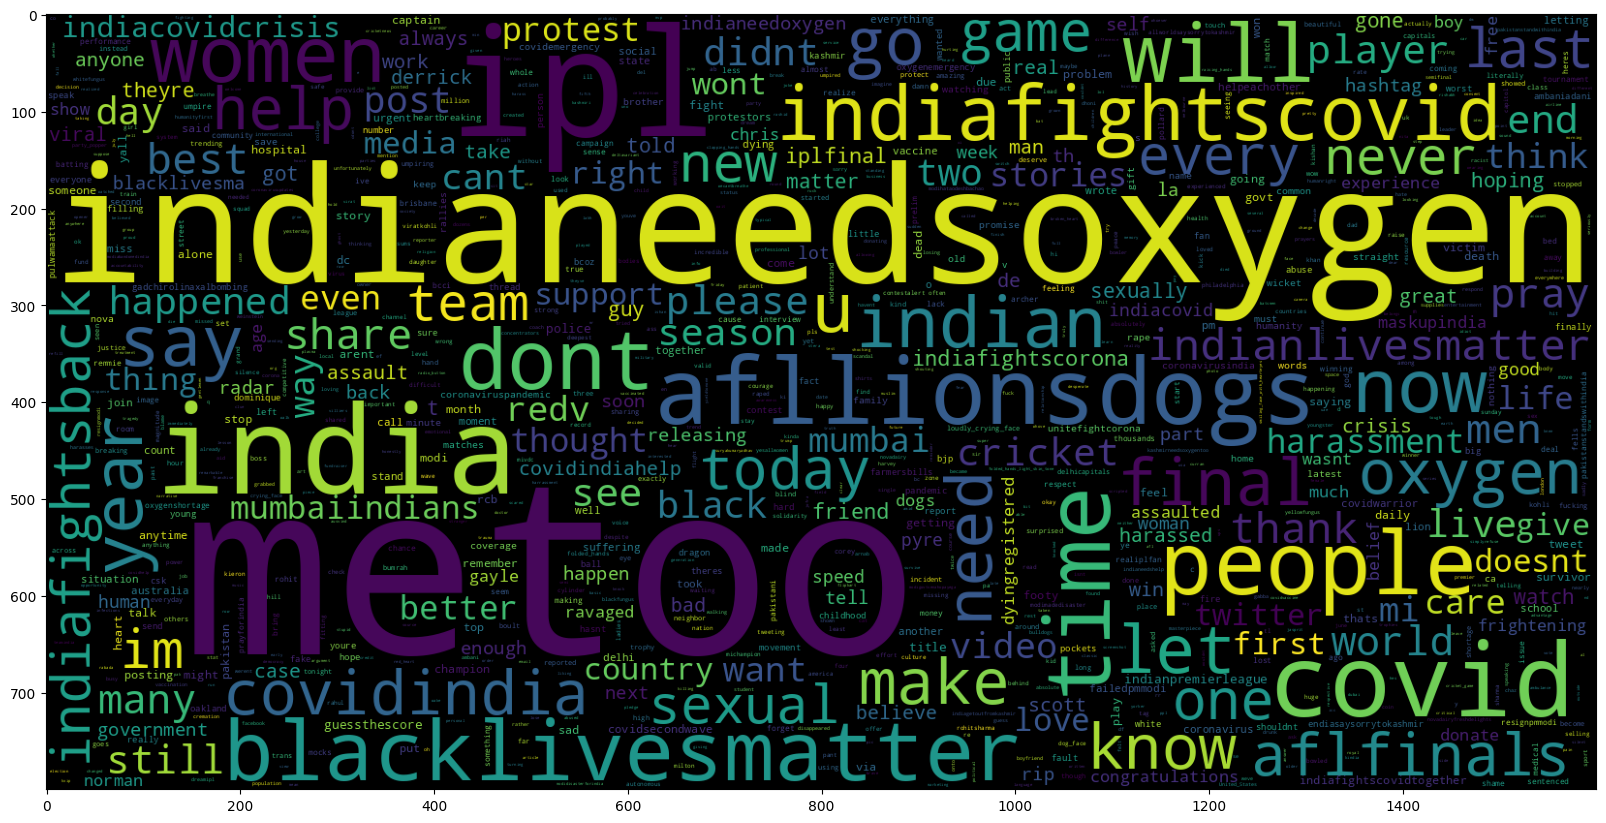

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data_pos = df['text_cleaned']
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos))
plt.figure(figsize=(20, 20))
plt.imshow(wc)


#### Feature Engineering

In [ ]:
! pip install gensim


In [ ]:
import gensim

# Initialize Word2Vec model
w2v_model = gensim.models.Word2Vec(min_count=1, window=2, vector_size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20)

# Build vocabulary
w2v_model.build_vocab(df['text_cleaned'].apply(lambda x: x.split()))

# Train Word2Vec model
w2v_model.train(df['text_cleaned'].apply(lambda x: x.split()), total_examples=w2v_model.corpus_count, epochs=50)


(480002, 1093300)

In [ ]:
# words related to covid
w2v_model.wv.most_similar(positive=["covid"])

[('share', 0.9988177418708801),
 ('people', 0.9987401962280273),
 ('deltaplusvariant', 0.9987009167671204),
 ('help', 0.9986116886138916),
 ('covidwarrior', 0.9984400868415833),
 ('deltavariant', 0.9983702898025513),
 ('facts', 0.9982764720916748),
 ('indiafightscorona', 0.9982409477233887),
 ('postcovid', 0.9982137084007263),
 ('failedpmmodi', 0.9982032775878906)]

#### Model : Latent Dirichlet algorithm (LDA)
<br>Latent Dirichlet allocation is one of the most popular methods for performing topic modeling. Each document consists of various words and each topic can be associated with some words. The aim behind the LDA to find topics that the document belongs to, on the basis of words contains in it. It assumes that documents with similar topics will use a similar group of words. This enables the documents to map the probability distribution over latent topics and topics are probability distribution.

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint

# Tokenize the text data
tokenized_text = df['tokens']

# Create a dictionary from the tokenized text
dictionary = corpora.Dictionary(tokenized_text)

# Convert tokenized text into a document-term matrix
doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in tokenized_text]

# Build LDA model
lda_model = gensim.models.LdaModel(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=10,  # Adjust the number of topics as needed
    passes=10,     # Number of passes over the corpus during training
    random_state=42  # Random state for reproducibility
)

# Print the topics and associated words
pprint(lda_model.print_topics())


[(0,
  '0.035*"afllionsdogs" + 0.032*"metoo" + 0.018*"aflfinals" + 0.012*"ipl" + '
  '0.012*"game" + 0.011*"time" + 0.008*"last" + 0.008*"best" + 0.007*"final" + '
  '0.007*"every"'),
 (1,
  '0.034*"indianeedsoxygen" + 0.030*"india" + 0.022*"covid" + 0.021*"go" + '
  '0.012*"let" + 0.010*"metoo" + 0.009*"video" + 0.008*"hop" + 0.008*"time" + '
  '0.008*"theyre"'),
 (2,
  '0.040*"metoo" + 0.017*"happen" + 0.011*"indianeedsoxygen" + 0.010*"ipl" + '
  '0.010*"woman" + 0.008*"didnt" + 0.008*"people" + 0.008*"say" + '
  '0.007*"blacklivesmatter" + 0.007*"sexual"'),
 (3,
  '0.057*"metoo" + 0.026*"ipl" + 0.009*"woman" + 0.009*"cricket" + '
  '0.008*"tell" + 0.007*"time" + 0.007*"life" + 0.007*"guessthescore" + '
  '0.007*"gayle" + 0.007*"chris"'),
 (4,
  '0.041*"indianeedsoxygen" + 0.021*"indiafightscovid" + 0.015*"covid" + '
  '0.013*"india" + 0.012*"indian" + 0.010*"indianlivesmatter" + 0.010*"ipl" + '
  '0.009*"blacklivesmatter" + 0.009*"end" + 0.009*"covidindia"'),
 (5,
  '0.028*"indianee

In [ ]:
# Initialize an empty list to store the predicted topic names for each tweet
predicted_topic_names = []

# Loop through each tweet
for doc_bow in doc_term_matrix:
    # Get the topic distribution for the current tweet
    topic_distribution = lda_model.get_document_topics(doc_bow)

    # Sort the topics by probability and get the topic with the highest probability
    top_topic = max(topic_distribution, key=lambda x: x[1])

    # Get the topic name corresponding to the top topic ID
    top_topic_name = lda_model.show_topic(top_topic[0])

    # Append the top topic name to the list of predicted topic names
    predicted_topic_names.append(top_topic_name)

# Add the predicted topic names to the DataFrame
df['predicted_topic_name'] = predicted_topic_names
predicted_topic_names


[[('metoo', 0.05653745),
  ('ipl', 0.025673006),
  ('woman', 0.009408858),
  ('cricket', 0.008928734),
  ('tell', 0.007880661),
  ('time', 0.0074821166),
  ('life', 0.0073747793),
  ('guessthescore', 0.0072694467),
  ('gayle', 0.0072694425),
  ('chris', 0.00726944)],
 [('metoo', 0.05653745),
  ('ipl', 0.025673006),
  ('woman', 0.009408858),
  ('cricket', 0.008928734),
  ('tell', 0.007880661),
  ('time', 0.0074821166),
  ('life', 0.0073747793),
  ('guessthescore', 0.0072694467),
  ('gayle', 0.0072694425),
  ('chris', 0.00726944)],
 [('metoo', 0.05653745),
  ('ipl', 0.025673006),
  ('woman', 0.009408858),
  ('cricket', 0.008928734),
  ('tell', 0.007880661),
  ('time', 0.0074821166),
  ('life', 0.0073747793),
  ('guessthescore', 0.0072694467),
  ('gayle', 0.0072694425),
  ('chris', 0.00726944)],
 [('metoo', 0.040301006),
  ('happen', 0.016628034),
  ('indianeedsoxygen', 0.010754468),
  ('ipl', 0.009663799),
  ('woman', 0.009640604),
  ('didnt', 0.007855629),
  ('people', 0.007688264),
  (

In [ ]:
# Extract the highest probability from each list in predicted_topic_names
highest_probabilities = [max(topic_probs, key=lambda x: x[1])[0] for topic_probs in predicted_topic_names]

# Convert the list to a numpy array
highest_probabilities_array = np.array(highest_probabilities)


In [ ]:
df['predicted_topic_name'] =highest_probabilities

In [ ]:
df

,tweet_id,username,tweet_text,hashtag,text_cleaned,tokens,predicted_topic_name
0,1,julie81,I wasn't going to tweet #metoo because we've b...,[metoo],i wasnt going to tweet metoo because weve been...,"[wasnt, go, tweet, metoo, weve, tweet, cry, hu...",metoo
1,2,richardhester,Me seeing you post #MeToo several months after...,[MeToo],me seeing you post metoo several months after ...,"[see, post, metoo, several, month, post, woman...",metoo
2,3,williamsjoseph,Me too\n\n#metoo,[metoo],me too metoo,[metoo],metoo
3,4,danielsmary,All the #metoo statuses and there's so many pe...,[metoo],all the metoo statuses and theres so many peop...,"[metoo, statuses, theres, many, people, havent...",metoo
4,5,carlwarren,"Every wolf whistle ???????\nEvery ""hey baby"" \...",[MeToo],every wolf whistle every hey baby every forced...,"[every, wolf, whistle, every, hey, baby, every...",afllionsdogs
...,...,...,...,...,...,...,...
1284,1285,wtate,RT @RedGga: Share this video pls\n\n.\n\n#love...,"[love, racialjustice, justiceforgeorgefloyd, p...",share this video pls love racialjustice justic...,"[share, video, pls, love, racialjustice, justi...",metoo
1285,1286,rachel71,RT @CNOEngland: There is no place for inequity...,"[BlackLivesMatter, teamCNO]",there is no place for inequity in nursing and ...,"[place, inequity, nursing, midwifery, blackliv...",indianeedsoxygen
1286,1287,elizabeth34,RT @elijahdaniel: RIP Derrick Scott. They’re o...,[BlackLivesMa],rip derrick scott theyre only releasing these ...,"[rip, derrick, scott, theyre, release, video, ...",indianeedsoxygen
1287,1288,piercemichael,RT @elijahdaniel: RIP Derrick Scott. They’re o...,[BlackLivesMa],rip derrick scott theyre only releasing these ...,"[rip, derrick, scott, theyre, release, video, ...",indianeedsoxygen


In [ ]:
from collections import Counter

# Count the frequency of each unique item in highest_probabilities
frequency_counts = Counter(highest_probabilities)

# Print the frequency counts
print(" Trending topics :")
for topic, count in frequency_counts.items():
    print(f"Topic: {topic}, Frequency: {count}")

 Trending topics :
Topic: metoo, Frequency: 518
Topic: afllionsdogs, Frequency: 183
Topic: ipl, Frequency: 157
Topic: indianeedsoxygen, Frequency: 431


#### Model Evaluation

In [ ]:
# Calculate perplexity
perplexity = lda_model.log_perplexity(doc_term_matrix)
print("Perplexity:", perplexity)

Perplexity: -7.875242642389424
